(18505, 9)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)       

200/200 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0335 - r2: 0.9689
Epoch 135/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0028 - mae: 0.0335 - r2: 0.9691
Epoch 136/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0337 - r2: 0.9684
Epoch 137/200
200/200 [==============================] - 1s 4ms/step - loss: 0.0030 - mae: 0.0347 - r2: 0.9674
Epoch 138/200
200/200 [==============================] - 1s 4ms/step - loss: 0.0028 - mae: 0.0336 - r2: 0.9691
Epoch 139/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0335 - r2: 0.9704
Epoch 140/200
200/200 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0333 - r2: 0.9696
Epoch 141/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0332 - r2: 0.9693
Epoch 142/200
200/200 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0334 - r2: 0.9696
Epoch 143/200
2

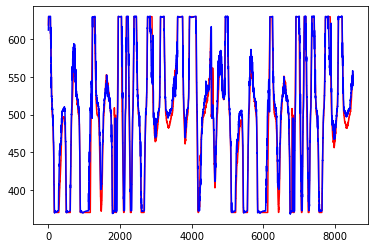

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import keras.backend as K
acc=0.9746
def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b/e
    return f



all_data = pd.read_csv('C:/Users/Chinese/Desktop/MODEL/Data.csv',encoding='gbk',header=None)
all_data=all_data.iloc[1:,0:]

print(all_data.shape)
x_data = all_data.iloc[:,0:8].values
y_data = all_data.iloc[:,8].values

# 
sc = MinMaxScaler(feature_range=(0, 1))

x_data = sc.fit_transform(x_data)
y_data = sc.fit_transform(y_data.reshape(-1,1))


x_train = x_data[0:10000]
y_train = y_data[0:10000]

# x_valid = x_data[8000:10000]
# y_valid = x_data[8000:10000]

x_test = x_data[10000:19000]
y_test = y_data[10000:19000]

model=keras.Sequential()
model.add(layers.Dense(64,input_dim=8))
model.add(Activation('relu'))#relu #softmax
model.add(keras.layers.Dropout(0.2))
model.add(layers.Dense(16,input_dim=64))
model.add(Activation('relu'))#relu #softmax
model.add(keras.layers.Dropout(0.2))
model.add(layers.Dense(8,input_dim=16))
model.add(Activation('relu'))#relu #softmax
model.add(layers.Dense(1,input_dim=8))
# model.add(Activation('relu'))#relu #softmax
# model.add(layers.Dense(1,input_dim=4))
print(model.summary())
model.compile(optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae',r2]
)

model.fit(x_train,y_train,epochs=200,batch_size=50,verbose=1)
model.save('C:/Users/Chinese/Desktop/MODEL/model.h5', overwrite=True, include_optimizer=True)

y_pred=model.predict(x_test)

y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)
plt.plot(y_test, c='red', label='actual')
plt.plot(y_pred, c='blue', label='predict')
plt.show()



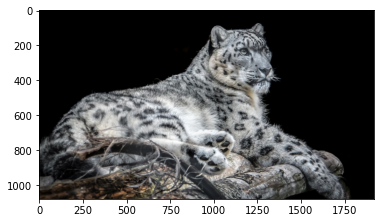

雪豹的准确率:0.9746
该物种确定为雪豹


In [12]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure("雪豹")
plt.imshow(img)
plt.show()
print('雪豹的准确率:'+str(acc))

if acc>0.95:
    print('该物种确定为雪豹')

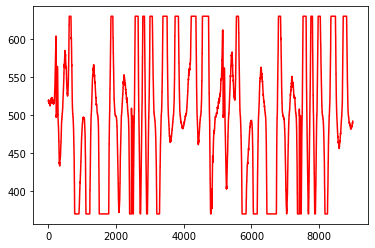

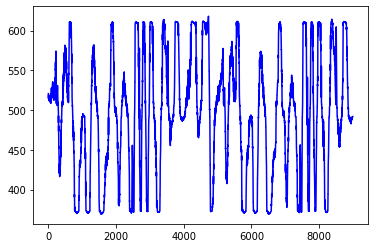

In [46]:
plt.plot(y_test, c='red', label='actual')
plt.show()
plt.plot(y_pred, c='blue', label='predict')
plt.show()


In [35]:
all_data = pd.read_csv('C:/Users/Chinese/Desktop/MODEL/Data.csv',encoding='gbk',header=None)
all_data=all_data.iloc[1:,0:]

print(all_data.shape)
x_data = all_data.iloc[:,0:8].values
y_data = all_data.iloc[:,8].values

print(x_data[0])
print(y_test[0])
print(y_pred[0])

(799, 9)
[343.   0. 515. 625. 530. 403.   5. 305.]
[492.]
[498.0717]
